In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Cek versi TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files

In [20]:
base_dir = '/content/drive/MyDrive/MP-1 PAS/archive (4)'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap'
)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 1230 images belonging to 3 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 309 images belonging to 3 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas: baseball, basketball, tennis_ball
])

In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Epoch 1/20
25/25 - 23s - 909ms/step - accuracy: 0.5675 - loss: 0.9315 - val_accuracy: 0.7312 - val_loss: 0.7755
Epoch 2/20
25/25 - 11s - 443ms/step - accuracy: 0.7512 - loss: 0.6869 - val_accuracy: 0.7437 - val_loss: 0.5775
Epoch 3/20
25/25 - 29s - 1s/step - accuracy: 0.7519 - loss: 0.6844 - val_accuracy: 0.7437 - val_loss: 0.6532
Epoch 4/20
25/25 - 21s - 838ms/step - accuracy: 0.7411 - loss: 0.6693 - val_accuracy: 0.8125 - val_loss: 0.5774
Epoch 5/20
25/25 - 40s - 2s/step - accuracy: 0.7638 - loss: 0.6082 - val_accuracy: 0.7875 - val_loss: 0.5723
Epoch 6/20
25/25 - 21s - 830ms/step - accuracy: 0.7837 - loss: 0.6034 - val_accuracy: 0.8375 - val_loss: 0.5337
Epoch 7/20
25/25 - 41s - 2s/step - accuracy: 0.7954 - loss: 0.5651 - val_accuracy: 0.8375 - val_loss: 0.5367
Epoch 8/20
25/25 - 21s - 821ms/step - accuracy: 0.7946 - loss: 0.5253 - val_accuracy: 0.8500 - val_loss: 0.4531
Epoch 9/20
25/25 - 21s - 830ms/step - accuracy: 0.7975 - loss: 0.5244 - val_accuracy: 0.8375 - val_loss: 0.4925
E

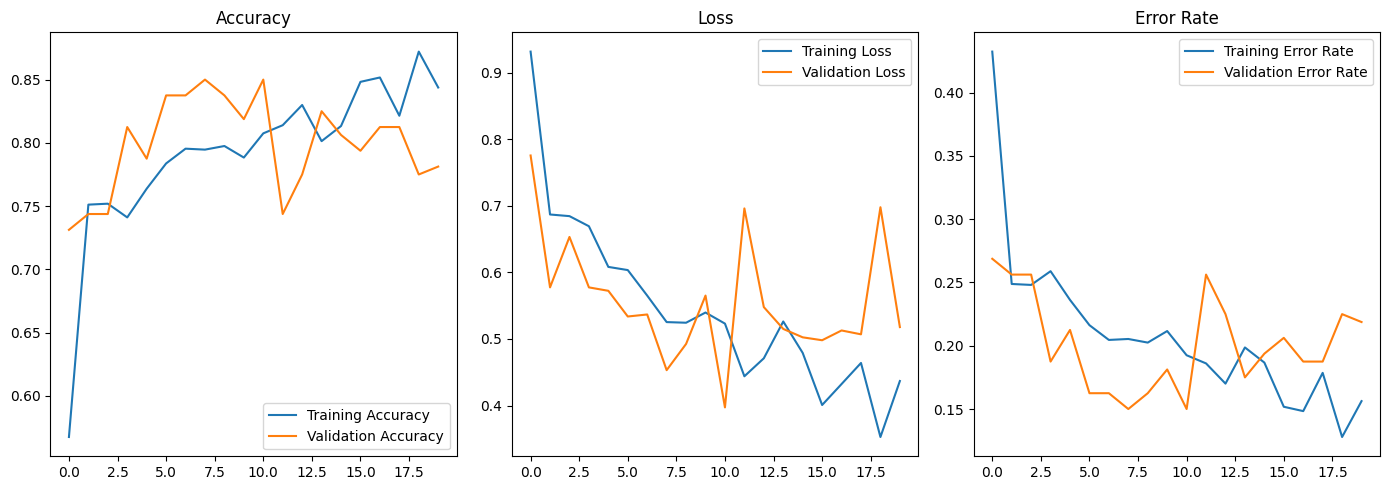

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

error = [1 - a for a in acc]
val_error = [1 - va for va in val_acc]

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Akurasi
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

# Error Rate
plt.subplot(1, 3, 3)
plt.plot(epochs_range, error, label='Training Error Rate')
plt.plot(epochs_range, val_error, label='Validation Error Rate')
plt.legend(loc='upper right')
plt.title('Error Rate')

plt.tight_layout()
plt.show()


Saving tennis_950.jpg to tennis_950.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
tennis_950.jpg: Predicted as tennis_ball


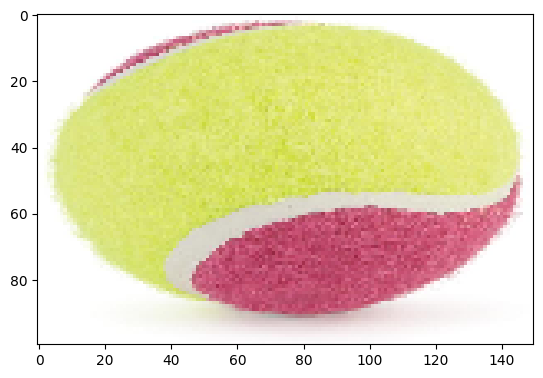

In [41]:
# Upload dan prediksi gambar
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(classes[0])]

    print(f"{fn}: Predicted as {predicted_class}")